In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dataset = pd.read_csv('Heart_disease.csv')
dataset.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [37]:
dataset['FriedPotato_Consumption'].unique()

array([ 12.,   4.,  16.,   8.,   0.,   1.,   2.,  30.,  20.,  15.,  10.,
         3.,   7.,  28.,   5.,   9.,   6., 120.,  32.,  14.,  60.,  33.,
        48.,  25.,  24.,  21.,  90.,  13.,  99.,  17.,  18.,  40.,  56.,
        34.,  36.,  44., 100.,  11.,  64.,  45.,  80.,  29.,  68.,  26.,
        50.,  22.,  95.,  23.,  27., 112.,  35.,  31.,  98.,  96.,  88.,
        92.,  19.,  76.,  49.,  97., 128.,  41.,  37.,  42.,  52.,  72.,
        46., 124.,  84.])

In [3]:
dataset.shape

(308854, 19)

In [4]:
dataset.info()

dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [5]:
dataset.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [6]:
dataset.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [7]:
dataset.duplicated().sum()

80

In [8]:
dataset = dataset.drop_duplicates()

dataset.duplicated().sum()

0

In [9]:
col = dataset['Heart_Disease']
dataset = dataset.drop(['Heart_Disease'], axis = 1)
dataset.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [10]:
dataset = pd.concat([dataset ,col], axis = 1)

In [11]:
dataset.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,No
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,Yes
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,No
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,Yes
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,No


In [12]:
sns.set(style='whitegrid')

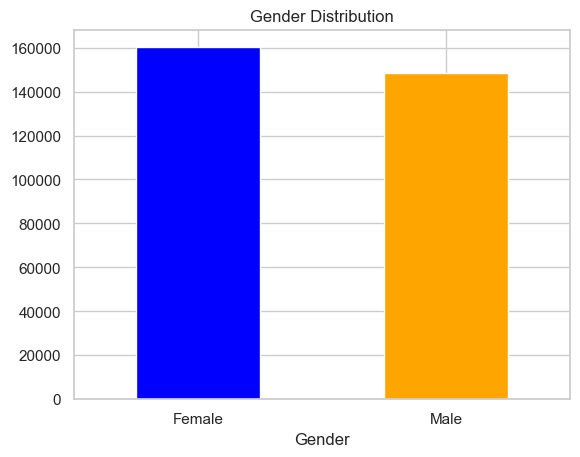

In [13]:
dataset['Sex'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

In [14]:
dataset['Heart_Disease'].value_counts()


Heart_Disease
No     283803
Yes     24971
Name: count, dtype: int64

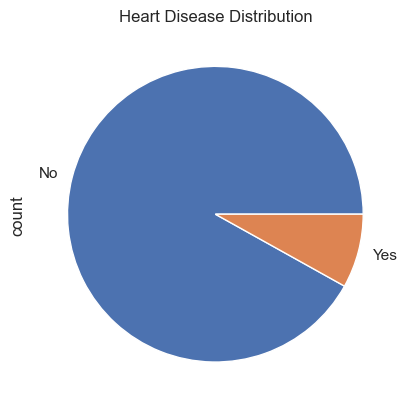

In [15]:
dataset['Heart_Disease'].value_counts().plot(kind='pie', color=['blue', 'orange'])
plt.title('Heart Disease Distribution')
plt.xticks(rotation=45)
plt.show()

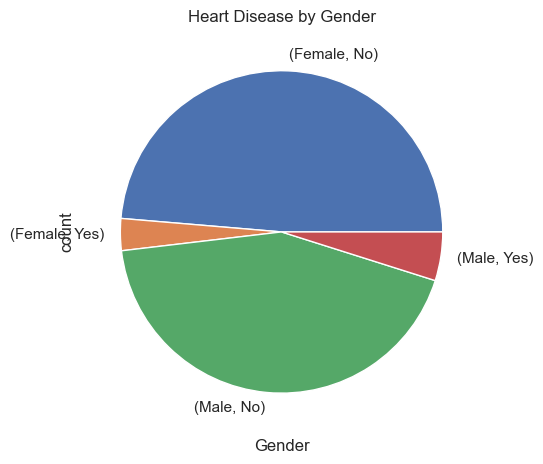

In [16]:
dataset.groupby('Sex')['Heart_Disease'].value_counts().plot(kind='pie', color=['blue', 'orange'])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

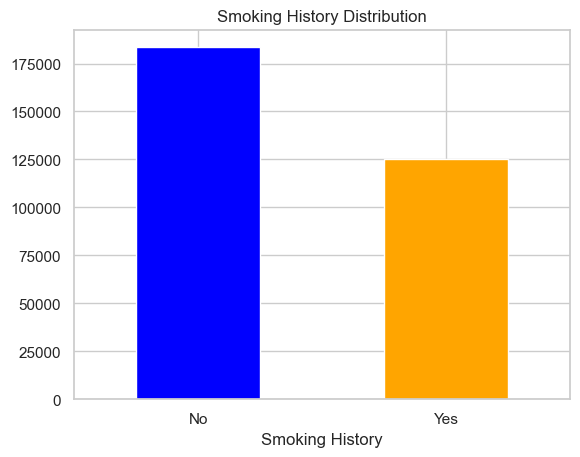

In [17]:
dataset['Smoking_History'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Smoking History Distribution')
plt.xlabel('Smoking History')
plt.xticks(rotation=0)
plt.show()

In [18]:
dataset.groupby(['Exercise', 'Smoking_History'])['Heart_Disease'].value_counts()

Exercise  Smoking_History  Heart_Disease
No        No               No                32068
                           Yes                3317
          Yes              No                28397
                           Yes                5687
Yes       No               No               141061
                           Yes                7070
          Yes              No                82277
                           Yes                8897
Name: count, dtype: int64

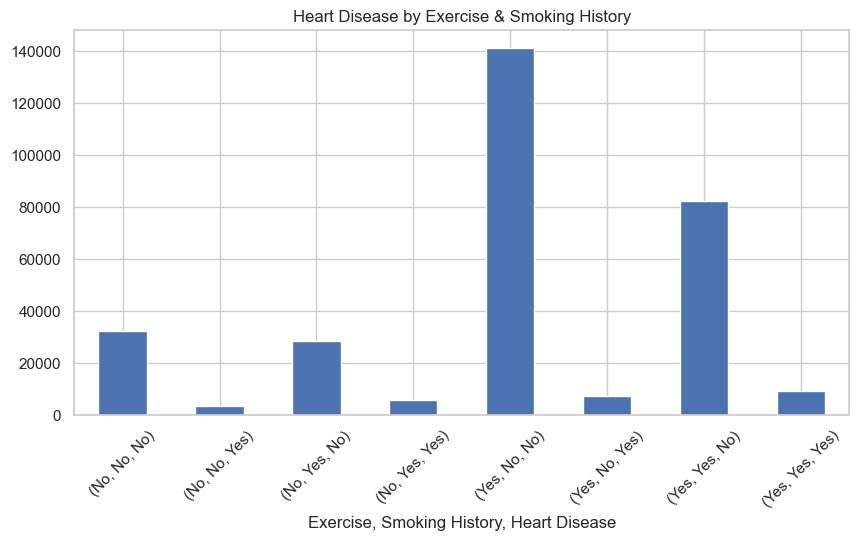

In [19]:
dataset.groupby(['Exercise', 'Smoking_History'])['Heart_Disease'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Heart Disease by Exercise & Smoking History')
plt.xlabel('Exercise, Smoking History, Heart Disease')
plt.xticks(rotation=45)
plt.show() 

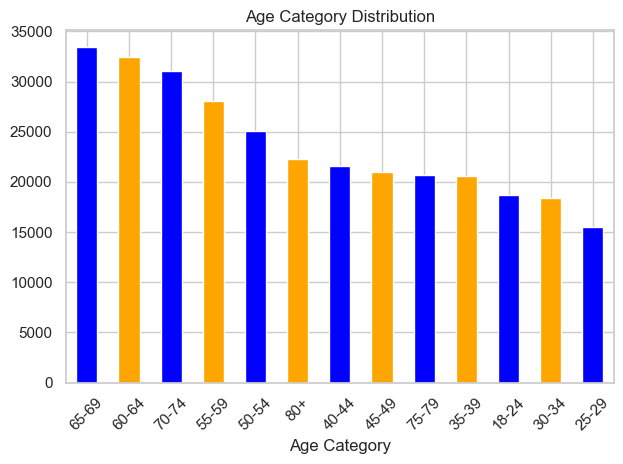

In [20]:
dataset['Age_Category'].value_counts().sort_values(ascending = False).plot(kind='bar', color=['blue', 'orange'])
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in range(len(dataset.columns)):
    if dataset.dtypes[i] == 'object':
        dataset[dataset.columns[i]] = encoder.fit_transform(dataset[dataset.columns[i]])

dataset.head()


,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,3,2,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,0
1,4,4,0,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1
2,4,4,1,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0
3,3,4,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,1
4,2,4,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0


In [120]:
corr = dataset.corr()
corr
#plt.figure(figsize=(10,8))
#sns.heatmap(corr, annot=True, cmap="coolwarm")
#plt.title('Correlation Heatmap')
#plt.tight_layout()
#plt.show()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
General_Health,1.000000,0.027431,0.036864,0.020864,0.004456,0.002313,-0.025157,0.014013,-0.013733,0.032378,0.001634,0.014861,0.013967,0.004324,0.023673,-0.010957,-0.021517,-0.000682,-0.020640
Checkup,0.027431,1.000000,-0.029803,0.079313,0.086779,0.035674,0.127858,0.150225,-0.100058,0.223116,-0.088951,0.012043,0.060903,-0.010064,-0.046631,0.039297,0.034925,-0.055706,0.083513
Exercise,0.036864,-0.029803,1.000000,-0.003963,-0.054363,-0.084673,-0.136589,-0.124785,0.059355,-0.122334,0.091622,-0.090121,-0.155732,-0.093241,0.095028,0.136782,0.124983,-0.036904,-0.096321
Skin_Cancer,0.020864,0.079313,-0.003963,1.000000,0.150781,-0.013041,0.032947,0.136146,0.009658,0.272075,0.006799,-0.028986,-0.037647,0.032793,0.042734,0.024143,0.012894,-0.038945,0.090835
Other_Cancer,0.004456,0.086779,-0.054363,0.150781,1.000000,0.015861,0.063873,0.129320,-0.042061,0.234464,-0.043476,-0.021169,0.001015,0.053390,-0.008704,0.007992,-0.003215,-0.033326,0.092369
Depression,0.002313,0.035674,-0.084673,-0.013041,0.015861,1.000000,0.053115,0.121562,-0.141457,-0.103195,-0.091315,0.047904,0.109557,0.100215,-0.028200,-0.039938,-0.051134,0.018108,0.032494
Diabetes,-0.025157,0.127858,-0.136589,0.032947,0.063873,0.053115,1.000000,0.133839,-0.013135,0.192806,-0.043093,0.158194,0.205292,0.053720,-0.114255,-0.019085,-0.027333,-0.004281,0.166218
Arthritis,0.014013,0.150225,-0.124785,0.136146,0.129320,0.121562,0.133839,1.000000,-0.100047,0.370996,-0.097794,0.074068,0.137924,0.123128,-0.024968,-0.001983,-0.018803,-0.050994,0.153891
Sex,-0.013733,-0.100058,0.059355,0.009658,-0.042061,-0.141457,-0.013135,-0.100047,1.000000,-0.060234,0.698129,0.353989,0.010978,0.073407,0.129311,-0.092486,-0.069169,0.130049,0.072606
Age_Category,0.032378,0.223116,-0.122334,0.272075,0.234464,-0.103195,0.192806,0.370996,-0.060234,1.000000,-0.120922,-0.062308,-0.007426,0.133155,0.012833,0.043661,0.036030,-0.142761,0.229027


In [121]:
x = dataset.drop(['Heart_Disease'], axis=1)
y = dataset['Heart_Disease']
x

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,1,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,3,1,0,0,0,2,0,1,9,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,4,0,1,0,0,1,3,0,0,2,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,4,4,1,0,0,0,0,0,1,9,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


Accuracy: 91.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.46      0.03      0.05      5078

    accuracy                           0.92     61755
   macro avg       0.69      0.51      0.50     61755
weighted avg       0.88      0.92      0.88     61755

Confusion Matrix:


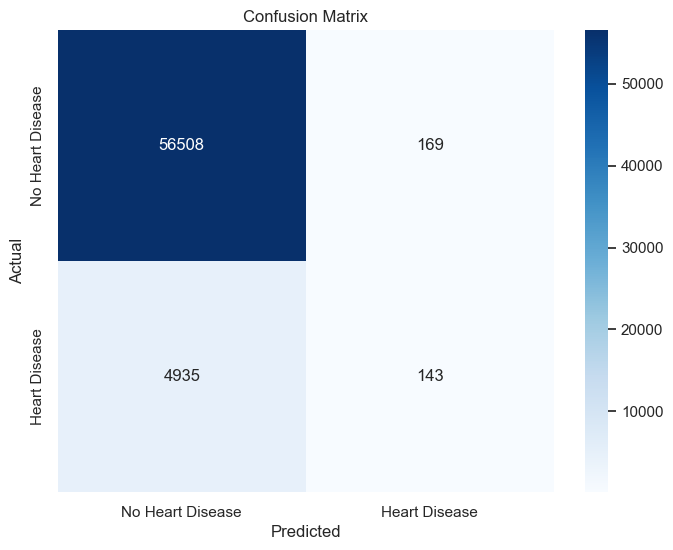

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(x_train, y_train)
y_pred = rfc_model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [123]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.98%


In [124]:
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import GridSearchCV

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.79%


In [29]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gridkn.fit(x_train, y_train)
gridkn.fit(x_train, y_train)

y_pred = gridkn.predict(x_test)
accuracy_kn = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy_kn * 100:.2f}%')

KNN Accuracy: 91.46%


In [125]:
y_pred = lr_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [126]:
x

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,1,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,3,1,0,0,0,2,0,1,9,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,4,0,1,0,0,1,3,0,0,2,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,4,4,1,0,0,0,0,0,1,9,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


In [127]:
y

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Heart_Disease, Length: 308774, dtype: int32

In [128]:
user_input = [[1, 3, 1, 0, 0, 0, 2, 0, 1, 9, 180, 69, 21, 0, 8, 15, 60, 4]]
results = lr_model.predict(user_input)
print("Prediction", results)

Prediction [0]


In [156]:
import joblib as jb
jb.dump(lr_model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']